In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../..")
import matplotlib.animation as animation
from data.Dataset import CIFARDataset, CelebDataset
from skimage.metrics import structural_similarity


# Load data

In [24]:
H = W = 32
batch_size = 1

# pick dataset
#dataset = CelebDataset(H=H, W=W, n=1, repeat=batch_size)
#dataset = ImageNetDataset(H=H, W=W, n=1, repeat=batch_size)
dataset = CIFARDataset(H=H, W=W, n=1, seed=9, repeat=batch_size)
samples = np.load("samples.npy")
ground_truth = [x.numpy() for x in dataset.data]

# SSIM

In [25]:
def ssim_metric(ground_truths, diffused, gaussian=False):
    losses = []
    for ground, diffuse in zip(ground_truths, diffused):
        norm_diffuse = (diffuse - diffuse.min()) / (diffuse.max() - diffuse.min())
        losses.append(structural_similarity(ground, norm_diffuse, channel_axis=0, data_range=1, gaussian_weights=gaussian))

    return losses

In [26]:
ssim_metric(ground_truth, samples[-1], gaussian=False)

[0.6844101]

In [27]:
ssim_metric(ground_truth, samples[-1], gaussian=True)

[0.65579915]

# MSE

In [28]:
def mse_metric(ground_truths, diffused):
    losses = []
    for ground, diffuse in zip(ground_truths, diffused):
        norm_diffuse = (diffuse - diffuse.min()) / (diffuse.max() - diffuse.min())
        losses.append(np.mean((ground - norm_diffuse) ** 2))

    return losses

In [29]:
mse_metric(ground_truth, samples[-1])

[0.024342015]

# Ground truth

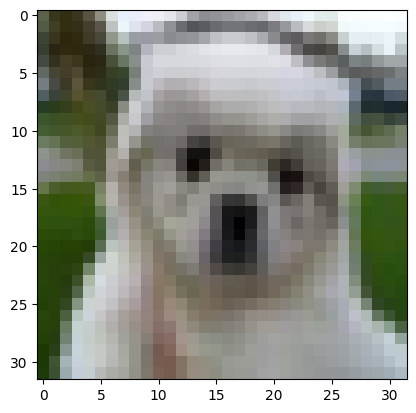

In [30]:
plt.imshow(np.moveaxis(ground_truth[0], 0, 2));

# Sample

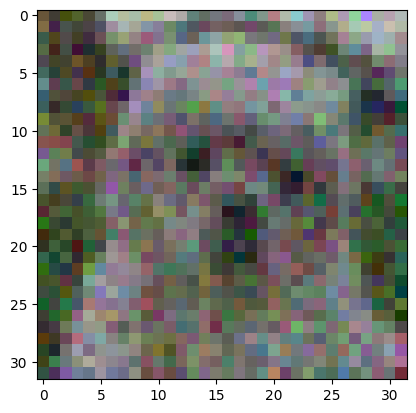

In [31]:
sample = samples[-1][0]
sample = (sample - sample.min()) / (sample.max() - sample.min())
plt.imshow(np.moveaxis(sample, 0, 2));

# Generate GIF (Saved to animation.gif)

In [32]:
def generate_gif(sample, sample_idx):

    def get_frame(i):
        return ((samples[i, sample_idx] - samples[i, sample_idx].min())/(samples[i, sample_idx].max() - samples[i, sample_idx].min())).transpose(1, 2, 0)

    fig = plt.figure(figsize=(8,8));

    im = plt.imshow(get_frame(0), animated=True)

    def frame(i):
        if i >= len(samples):
            im.set_data(get_frame(-1));
        else:
            im.set_data(get_frame(i));

        return [im]

    animation_fig = animation.FuncAnimation(fig, frame, frames=samples.shape[0] + 20, blit=False);

    animation_fig.save("animation.gif", writer=animation.PillowWriter(fps=10));

In [33]:
#generate_gif(samples, 0)